### Basis vecotrs
    
$\begin{equation*}
 i=
\begin{bmatrix}
i_{x}  \\
i_{y}  \\
\end{bmatrix}
j=
\begin{bmatrix}
j_{x} \\
j_{y} \\
\end{bmatrix}\\
\end{equation*}$

     1. Conventional basis vector :
$\begin{equation*}
 i=
\begin{bmatrix}
1  \\
0  \\
\end{bmatrix}
j=
\begin{bmatrix}
0 \\
1  \\
\end{bmatrix}\\
\end{equation*}$

     2. Rotation basis vector :
$\begin{equation*}
[i']=
\begin{bmatrix}
cos(ang) \\
sin(ang) \\
\end{bmatrix}
[j']=
\begin{bmatrix}
-sin(ang)  \\
 cos(ang)  \\
\end{bmatrix}
\end{equation*}$

### Basis vector to x,y co-ordinate :
$\begin{equation*}
vect=a_{i}i+a_{y}j\\
x=a_{i}*i_{x}+a_{j}*j_{x}\\
y=a_{i}*i_{y}+a_{j}*j_{y}\\
\end{equation*}$
    1. Conventional vector to x,y co-ordinates conversion   :

$\begin{equation*}
vect=a_{i}i+a_{j}j\\
x=a_{i}*i_{x}+a_{j}*j_{y}=a_{i}*1+a_{j}*0=a_{i}\\
y=a_{i}*i_{y}+a_{j}*j_{y}=a_{i}*0+a_{j}*1=a_{j}\\
\end{equation*}$

     2. Roation basis vector to x,y co-ordinate conversion :
     
$\begin{equation*}
theta= 30^o \\
vect=a_{i}i'+a_{j}j'\\
x=a_{i}*i'_{x}+a_{j}*j'_{x}=a_{i}*cos(\theta)-a_{j}*sin(\theta)\\
y=a_{i}*i'_{y}+a_{j}*j'_{y}=a_{i}*sin(\theta)+a_{j}*cos(\theta)\\
\end{equation*}$

$\begin{equation*}
\begin{bmatrix}
ix && jx \\
iy && jy \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
\end{bmatrix}=
\begin{bmatrix}
1 && 0  \\
0 && 1  \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
\end{bmatrix}\\
\begin{bmatrix}
i'x && j'x \\
i'y && j'y \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
\end{bmatrix}=
\begin{bmatrix}
cos(\theta) && -sin(\theta)  \\
sin(\theta) &&  cos(\theta)  \\
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
\end{bmatrix}
\end{equation*}$

In [141]:
import math
import cv2
import numpy as np
from matplotlib import pyplot as plt
#%matplotlib tk
angle=10
class Non_Linear_Transform():
    def __init__(self,vect,matrix):
        self.fig,self.ax=plt.subplots(nrows=1,ncols=1,figsize=(10,10))
        self.ox=0
        self.oy=0
        self.gx=8
        self.gy=8
        self.box=None
        self.Xaxis=None
        self.Yaxis=None
        self.Xs=[]
        self.Ys=[]
        self.matrix=matrix
        self.vect=self.interpolate(vect)
        self._Box()
        self._Axis()
        self._Grid()
        self.Transform_All()
        self.Draw()
        
    def Draw(self):
        grid=True
        marker='b'
        self.ax.plot(self.vect[:,0],self.vect[:,1],marker,linewidth=5)
        self.ax.plot(self.box[:,0],self.box[:,1],marker,alpha=0.5)
        self.ax.plot(self.Xaxis[:,0],self.Xaxis[:,1],marker+'--')
        self.ax.plot(self.Yaxis[:,0],self.Yaxis[:,1],marker+'--')
        if grid==True:
            for xx,yy in zip(self.Xs,self.Ys):
                #print(xx)
                self.ax.plot(xx[:,0],xx[:,1],marker+'--')
                self.ax.plot(yy[:,0],yy[:,1],marker+'--')

        marker='c'
        self.ax.plot(self.tvect[:,0],self.tvect[:,1],marker,linewidth=5)
        self.ax.plot(self.tbox[:,0],self.tbox[:,1],marker,alpha=0.5)
        self.ax.plot(self.TXaxis[:,0],self.TXaxis[:,1],marker+'--')
        self.ax.plot(self.TYaxis[:,0],self.TYaxis[:,1],marker+'--')
        if grid==True:
            for txx,tyy in zip(self.txx,self.tyy):
                self.ax.plot(txx[:,0],txx[:,1],marker+'--')
                self.ax.plot(tyy[:,0],tyy[:,1],marker+'--')
        plt.show()

    
    def _Box(self):
        dx=1
        dy=1
        pts=[[self.ox-dx,self.oy+dy],
        [self.ox+dx,self.oy+dy],
        [self.ox+dx,self.oy-dy],
        [self.ox-dx,self.oy-dy],
        [self.ox-dx,self.oy+dy]]
        _pts=self.interpolate([pts[0],pts[1]])
        _pts=np.concatenate((_pts,self.interpolate([pts[1],pts[2]])))
        _pts=np.concatenate((_pts,self.interpolate([pts[2],pts[3]])))
        _pts=np.concatenate((_pts,self.interpolate([pts[3],pts[4]])))
        _pts=np.concatenate((_pts,self.interpolate([pts[4],pts[0]])))
        self.box=np.array(_pts,dtype=np.float64)
        return self.box
    def interpolate(self,pts,N=10):
        start=pts[0].copy()
        end=pts[-1].copy()
        xx=np.linspace(start[0],end[0],N)
        yy=np.linspace(start[1],end[1],N)
        curve=[]
        for x,y in zip(xx,yy):
            curve.append([x,y])
        curve=np.array(curve,dtype=np.float64)
        return curve
    def _Axis(self):
        ax1=[[self.ox-self.gx//2,self.oy],
        [self.ox+self.gx//2,self.oy]]
        ax2=[[self.ox,self.oy-self.gy//2],
        [self.ox,self.oy+self.gy//2]]
        ax1=self.interpolate(ax1,100)
        ax2=self.interpolate(ax2,100)
        self.Xaxis=np.array(ax1,dtype=np.float64)
        self.Yaxis=np.array(ax2,dtype=np.float64)
        return self.Xaxis,self.Yaxis
    def _Grid(self):
        _y=-self.gy//2
        _x=-self.gx//2
        
        #y=a , where a range(-gy,+gy,1)//equation for line parallel to x axis
        for i in range(self.gx+1):
            ax1=[[self.ox-self.gx//2,_y],
                 [self.ox+self.gx//2,_y]]
            ax1=self.interpolate(ax1)
            self.Xs.append(ax1)
            _y+=1
        #x=a , where a range(-gx,+gx,1)
        for i in range(self.gy+1): 
            ax2=[[_x,self.oy-self.gy//2],
                 [_x,self.oy+self.gy//2]]
            ax2=self.interpolate(ax2)
            self.Ys.append(ax2)
            _x+=1
        self.Xs=np.array(self.Xs,dtype=np.float64)
        self.Ys=np.array(self.Ys,dtype=np.float64)
    def mul_pts(self,source):
        points=source.copy()
        
        #points[i]=points[i].dot(self.matrix)
        points=np.matmul(self.matrix,points.T)
        points=points.T
        return points.copy()
    def mul_pts_nl(self,source):
        points=source.copy()
        for i in range(len(points)):
            mat=self.matrix(points[i][0],points[i][1])
            points[i]=np.matmul(mat,points[i])
        return points.copy()
    def Transform_All(self):
            self.tvect=self.mul_pts_nl(self.vect)
            self.tbox=self.mul_pts_nl(self.box)
            self.TXaxis=self.mul_pts_nl(self.Xaxis)
            self.TYaxis=self.mul_pts_nl(self.Yaxis)
            self.txx= []
            self.tyy= []
            for _xx,_yy in zip(self.Xs,self.Ys):
                self.txx.append(self.mul_pts_nl(_xx))
                self.tyy.append(self.mul_pts_nl(_yy))
            

            return 0

$\begin{equation*}
\theta=f(x,y)=x^2+y^2\\
vect=a_{i}i'+a_{j}j'\\
x=a_{i}*i'_{x}+a_{j}*j'_{x}=a_{i}*cos(\theta)-a_{j}*sin(\theta)\\
y=a_{i}*i'_{y}+a_{j}*j'_{y}=a_{i}*sin(\theta)+a_{j}*cos(\theta)\\
.\\
.\\
vect=a_{i}i+a_{y}j\\
x=f_{x}(x,y)=a_{i}*i_{x}+a_{j}*j_{x}\\
y=f_{y}(x,y)=a_{i}*i_{y}+a_{j}*j_{y}\\
.\\
.\\
\begin{bmatrix}
\frac{\partial }{\partial x}f_{x}(x,y) &&  \frac{\partial }{\partial y}f_{x}(x,y) \\
\frac{\partial }{\partial x}f_{y}(x,y) &&  \frac{\partial }{\partial y}f_{y}(x,y) \\
\end{bmatrix}
\end{equation*}$

/home/irfan_hasib/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in double_scalars
/home/irfan_hasib/.local/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in double_scalars


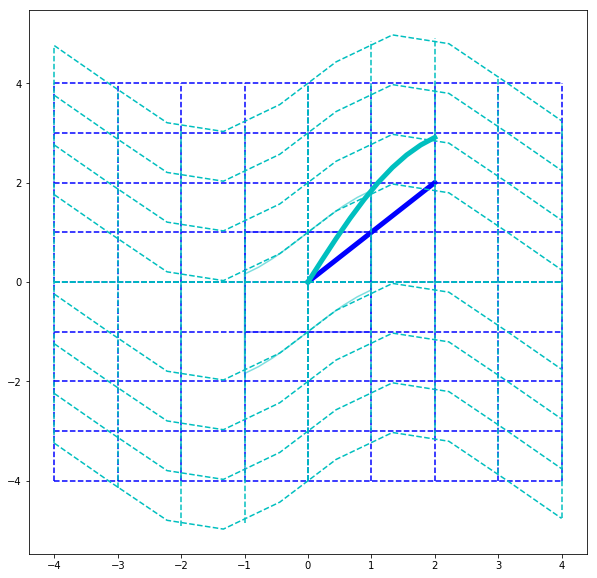

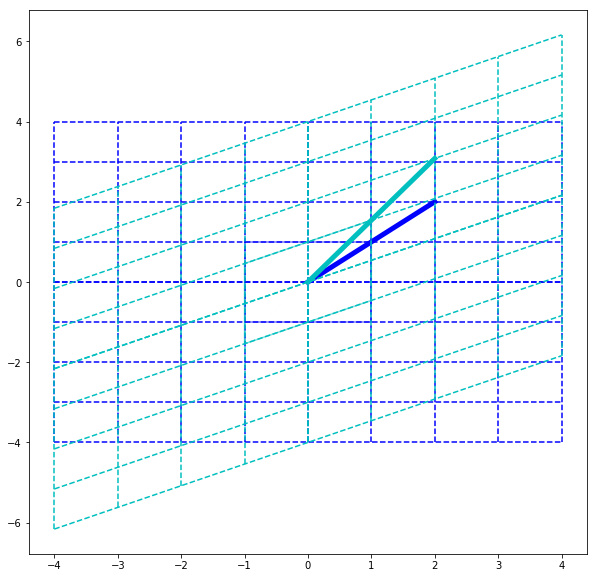

In [156]:

import time
#for i in range(1,90,10):    
#    lt=Linear_Transform(angle=i)
#    time.sleep(.1)
phi=np.deg2rad(25)
matrix1=np.array([[math.cos(phi),math.sin(phi)],
                [-math.sin(phi),math.cos(phi)]])
matrix2=np.array([[1 , 1],
                 [0 , 1]])
matrix3=np.array([[1 , 1],
                 [1 , 1]])
matrix4=np.array([[1 , 1],
                 [1 , 2]])
vect=[[0,0],
      [2,2]]
#vect=[[1,1]]
vect=np.array(vect,dtype=np.float64)
mats = [matrix1,matrix2,matrix3,matrix4]
#for mat in mats:
    #lt=Linear_Transform(vect,mat)
def func_1(x,y):
    ix=1#np.sin(y)/x
    iy=0
    jx=0
    jy=1+np.sin(x)/y
    mat=[[ix, jx],
         [iy, jy]]
    mat=np.nan_to_num(mat)
    return mat
def func_2(x,y):
    x=1
    y=1
    ix=1/x
    iy=np.cos(x)/x
    jx=0
    jy=1/y#np.sin(x)
    mat=[[ix, jx],
         [iy, jy]]
    mat=np.nan_to_num(mat)
    return mat
def func_3(a,b):
    #print('func : iy=1+np.sin(x)')
    ret=1+.1*a+np.sin(.1*b)
    return ret
def func_4(a,b):
    phi=0.1*(a**2+b**2)
    #phi=np.deg2rad(25)
    mat=np.array([[math.cos(phi),-math.sin(phi)],
                     [math.sin(phi),math.cos(phi)]])
    return mat
def func_5(a,b):
    #x=1
    #y=1
    ang=0.4*(x**2+y**2)
    fxx=-2*x*math.sin(ang)-2*x*math.cos(ang)
    fxy=-2*y*math.sin(ang)-2*y*math.cos(ang)
    fyx=2*x*math.cos(ang)-2*x*math.sin(ang)
    fyy=2*y*math.cos(ang)-2*y*math.sin(ang)
    #phi=np.deg2rad(25)
    mat=np.array([[0.4*fxx,0.4*fxy],
                  [0.4*fyx,0.4*fyy]])
    return mat
def matrix_nl(x,y):
    ix=func_3(x,y)
    iy=0
    jx=0
    jy=func_3(y,x)
    mat=np.array([[ix, jx],
                  [iy ,jy]])
    return mat
lt=Non_Linear_Transform(vect,func_1)
lt1=Non_Linear_Transform(vect,func_2)
#lt.Xaxis